## 1.Data Loading & Exploration

### 1.1 Load data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Load data
df =pd.read_csv("streamworks_user_data.csv")


# Show first few rows
df.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


### 1.2 DataSet Struture 

In [3]:
#Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [4]:
# Describe numerical columns
df.describe()

,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000


In [5]:
#Value counts for categorical columns
for col in ['gender','country', 'subscription_type', 'received_promotions','referred_by_friend', 'is_churned']:
    print(f"\n{col}:\n", df[col].value_counts())


gender:
 gender
Female    510
Other     506
Male      483
Name: count, dtype: int64

country:
 country
Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
Name: count, dtype: int64

subscription_type:
 subscription_type
Basic       505
Premium     499
Standard    493
Name: count, dtype: int64

received_promotions:
 received_promotions
No     763
Yes    734
Name: count, dtype: int64

referred_by_friend:
 referred_by_friend
Yes    752
No     745
Name: count, dtype: int64

is_churned:
 is_churned
0.0    1148
1.0     351
Name: count, dtype: int64


In [6]:
# Checkfor missing values
df.isnull().sum()

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

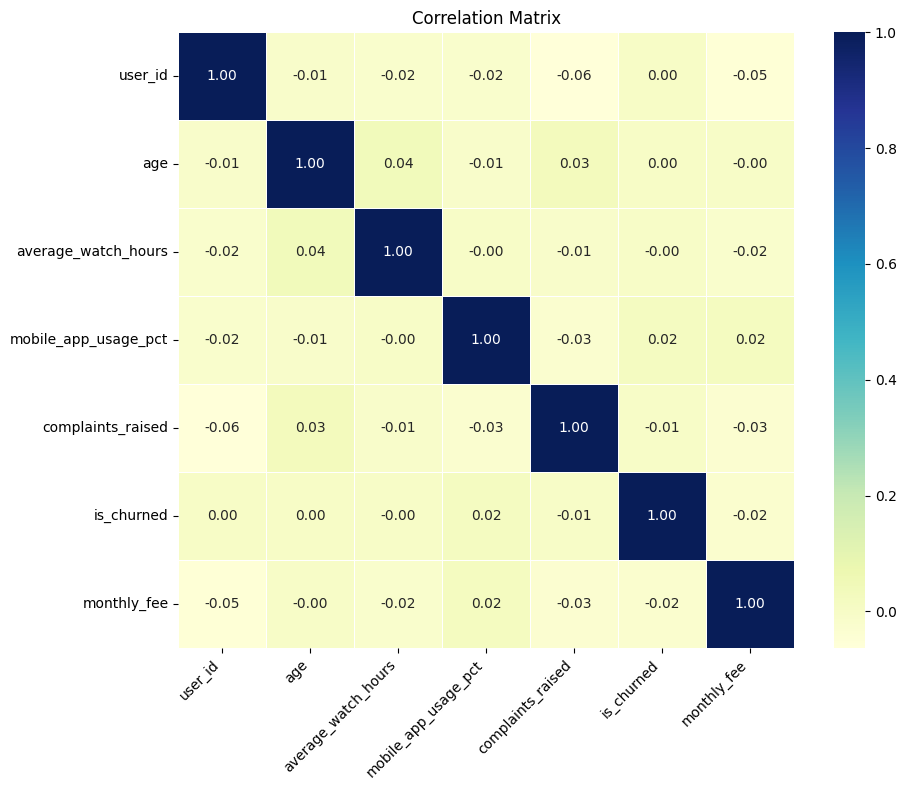

No highly correlated features found. No columns were dropped.


In [7]:
#Calculate the correlation matrix (absolute values)
corr_matrix =df.corr(numeric_only=True)
corr_matrix_abs = corr_matrix.abs()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    square=True
)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Identify highly correlated features
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
threshold =0.8
to_drop =[column for column in upper.columns if any(upper[column] > threshold)]

#Conditionally drop correlated features
if to_drop:
    print("Features to drop due to high correlation:", to_drop)
    df_reduced =df.drop(columns=to_drop)
else:
    print("No highly correlated features found. No columns were dropped.")
    df_reduced= df.copy()

## 2. Clean & Prepare the Data 

### 2.1 Data Cleaning & Preparation

In [8]:
#Convert dates to datetime
df['signup_date']= pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# Create 'tenure_days'(how long user has been active)
df['tenure_days']= (df['last_active_date'] - df['signup_date']).dt.days

# Create'is_loyal'(loyal if tenure > 180 days)
df['is_loyal'] =(df['tenure_days']> 180).astype(int)


#Show the first few rows of the new columns
print(df[['tenure_days','is_loyal']].head())

   tenure_days  is_loyal
0        159.0         0
1        893.0         1
2       1057.0         1
3        668.0         1
4        715.0         1


C:\Users\PC\AppData\Local\Temp\ipykernel_14268\1013326685.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date']= pd.to_datetime(df['signup_date'])


### 2.2 Handle Missing Values

In [9]:
# Drop rowswith missing is_churned (target variable must not be missing)
if df['is_churned'].isnull().sum() > 0:
    df =df.dropna(subset=['is_churned'])

# For date columns, drop rows with missing values (dates are essential for tenure calculations)
date_cols= ['signup_date', 'last_active_date']
df.dropna(subset=date_cols, inplace=True)

# Interpolate missing user_id values 
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')  
df['user_id'] =df['user_id'].interpolate(method='linear')     
df['user_id'] = df['user_id'].round().astype(int)           

# Impute missing values in numerical columns with the median
num_cols= ['age','average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'monthly_fee', 'tenure_days']
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values in categorical columns with 'Unknown'
cat_cols =['gender','country','subscription_type','received_promotions', 'referred_by_friend']
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna('Unknown', inplace=True)

# Check again for missing values
print(df.isnull().sum())


user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_14268\3533424634.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_14268\3533424634.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### 2.3 Encode Categorical Features

### Handling and Encoding Categorical Variables

To prepare the data for modeling, categorical variables are converted into numeric formats:

- **Binary columns:**  
  For features such as `received_promotions` and `referred_by_friend`, any 'Unknown' values are treated as missing and set to zero, assuming that a lack of information likely means a negative response. 'Yes' is encoded as 1 and 'No' as 0, making these columns suitable for modeling.

- **Nominal categorical columns:**  
  Columns like `gender`, `country`, and `subscription_type` are one-hot encoded. This process creates new columns for each possible category, so the model can interpret these variables without assuming any order or hierarchy.

Encoding categorical variables this way ensures all features are numeric and compatible with machine learning algorithms.


In [10]:
#Handle 'Unknown' values in binary categorical columns: set as NaN
binary_cols= ['received_promotions','referred_by_friend']
for col in binary_cols:
    df[col]= df[col].replace('Unknown', np.nan)

#Map 'Yes' to 1 and 'No' to 0
for col in binary_cols:
    df[col]= df[col].map({'Yes': 1, 'No': 0})

# Impute remaining NaNs (formerly 'Unknown') with 0
for col in binary_cols:
    df.fillna({col: 0}, inplace=True)

#One-hot encode nominal categorical columns
nominal_cols =[col for col in ['gender', 'country', 'subscription_type'] if col in df.columns]
df = pd.get_dummies(df,columns=nominal_cols, drop_first=True)

# Print first rows of all encoded categorical columns for verification
print("Binary-encoded columns:\n", df[binary_cols].head())
dummy_cols=[col for col in df.columns if col.startswith('gender_') or col.startswith('country_') or col.startswith('subscription_type_')]
print("Dummy-encoded columns:\n", df[dummy_cols].head())

Binary-encoded columns:
    received_promotions  referred_by_friend
0                  0.0                 0.0
1                  0.0                 1.0
2                  0.0                 1.0
3                  1.0                 1.0
4                  0.0                 1.0
Dummy-encoded columns:
    gender_Male  gender_Other  country_France  country_Germany  country_India  \
0        False          True            True            False          False   
1         True         False           False            False           True   
2         True         False           False            False          False   
3        False          True           False             True          False   
4        False         False           False            False           True   

   country_UK  country_USA  country_Unknown  subscription_type_Premium  \
0       False        False            False                      False   
1       False        False            False                     

In [11]:
# Check dtypes and head again
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1495 entries, 0 to 1499
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     1495 non-null   int64         
 1   age                         1495 non-null   float64       
 2   signup_date                 1495 non-null   datetime64[ns]
 3   last_active_date            1495 non-null   datetime64[ns]
 4   average_watch_hours         1495 non-null   float64       
 5   mobile_app_usage_pct        1495 non-null   float64       
 6   complaints_raised           1495 non-null   float64       
 7   received_promotions         1495 non-null   float64       
 8   referred_by_friend          1495 non-null   float64       
 9   is_churned                  1495 non-null   float64       
 10  monthly_fee                 1495 non-null   float64       
 11  tenure_days                 1495 non-null   float64       
 1

,user_id,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,...,gender_Other,country_France,country_Germany,country_India,country_UK,country_USA,country_Unknown,subscription_type_Premium,subscription_type_Standard,subscription_type_Unknown
0,1001,56.0,2025-02-04,2025-07-13,42.6,77.4,1.0,0.0,0.0,1.0,...,True,True,False,False,False,False,False,False,True,False
1,1002,69.0,2023-02-01,2025-07-13,65.3,98.0,4.0,0.0,1.0,1.0,...,False,False,False,True,False,False,False,False,False,False
2,1003,46.0,2022-08-21,2025-07-13,40.1,47.8,0.0,0.0,1.0,1.0,...,False,False,False,False,True,False,False,True,False,False
3,1004,32.0,2023-09-14,2025-07-13,5.8,53.2,1.0,1.0,1.0,1.0,...,True,False,True,False,False,False,False,True,False,False
4,1005,60.0,2023-07-29,2025-07-13,32.7,16.8,5.0,0.0,1.0,0.0,...,False,False,False,True,False,False,False,False,True,False


## 3. Statistical Analysis & Insights

### 3.1 Chi-Square Test: Categorical Variables vs Churn

For each categorical variable, we state the hypotheses:

- **Null hypothesis (H₀):** The variable is independent of churn (no association).
- **Alternative hypothesis (H₁):** The variable is associated with churn (not independent).

We perform the chi-square test and obtain the p-value:
- If p-value < 0.05: reject H₀; evidence of association.
- If p-value ≥ 0.05: fail to reject H₀; no evidence of association.

In [27]:
alpha = 0.05  # significance level

# Gender vs Churn
gender_cols =[col for col in df.columns if col.startswith('gender_')]
for col in gender_cols:
    contingency= pd.crosstab(df[col], df['is_churned'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square for {col} vs Churn: p-value = {p:.4f}")
    if p < alpha:
        print(f"Reject H0: There IS a significant association between {col} and churn.\n")
    else:
        print(f"Fail to reject H0: NO significant association between {col} and churn.\n")

# Received promotions vs Churn
contingency =pd.crosstab(df['received_promotions'], df['is_churned'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square for Received Promotions vs Churn: p-value = {p:.4f}")
if p < alpha:
    print(" Reject H0: There IS a significant association between received promotions and churn.\n")
else:
    print("Fail to reject H0: NO significant association between received promotions and churn.\n")

# Referred byfriend vs Churn
contingency =pd.crosstab(df['referred_by_friend'], df['is_churned'])
chi2, p, dof,expected =chi2_contingency(contingency)
print(f"Chi-square for Referred by Friend vs Churn: p-value = {p:.4f}")
if p < alpha:
    print("Reject H0: There IS a significant association between referred by friend and churn.\n")
else:
    print(" Fail to reject H0: NO significant association between referred by friend and churn.\n")



Chi-square for gender_Male vs Churn: p-value = 0.3585
Fail to reject H0: NO significant association between gender_Male and churn.

Chi-square for gender_Other vs Churn: p-value = 0.3053
Fail to reject H0: NO significant association between gender_Other and churn.

Chi-square for Received Promotions vs Churn: p-value = 0.1078
Fail to reject H0: NO significant association between received promotions and churn.

Chi-square for Referred by Friend vs Churn: p-value = 0.4375
 Fail to reject H0: NO significant association between referred by friend and churn.



### 3.2 T-Test: Watch Hours by Churn Status

For the variable **average_watch_hours**, we compare churned and non-churned users using a two-sample t-test:

- **Null hypothesis (H₀):** There is no difference in average watch hours between churned and not churned users.
- **Alternative hypothesis (H₁):** There is a significant difference in average watch hours between the two groups.

We conduct the t-test and examine the p-value:
- If p-value < 0.05: reject H₀; there **is** a significant difference in average watch hours between churned and not churned users.
- If p-value ≥ 0.05: fail to reject H₀; there is **no** significant difference in average watch hours between the groups.


In [28]:
churned = df[df['is_churned'] == 1]['average_watch_hours']
not_churned = df[df['is_churned'] == 0]['average_watch_hours']

t_stat, p_val =ttest_ind(churned, not_churned, nan_policy='omit')
print(f"T-test: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

alpha = 0.05  # significance level

if p_val < alpha:
    print("  Reject H0: There IS a significant difference in average watch hours between churned and not churned users.\n")
else:
    print("Fail to reject H0: NO significant difference in average watch hours between churned and not churned users.\n")


T-test: t-stat = -0.19, p-value = 0.8496
Fail to reject H0: NO significant difference in average watch hours between churned and not churned users.



### 3.3 Visualisations: Key Features by Churn

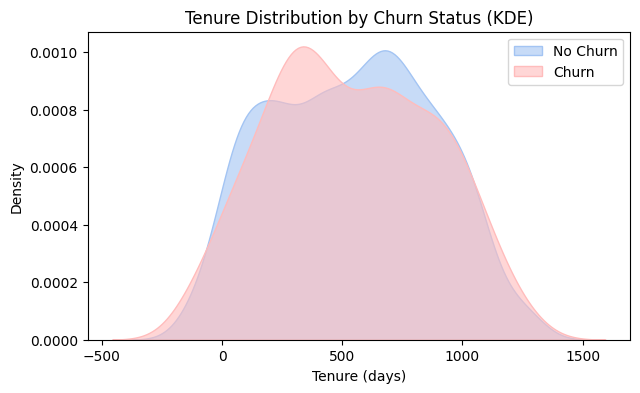

In [14]:
# KDE Plot:Tenure Distributionby Churn Status
plt.figure(figsize=(7, 4))
sns.kdeplot(
    data=df[df['is_churned']==0],
    x='tenure_days',
    fill=True,
    color='#A3C4F3',
    label='No Churn',
    alpha=0.6
)
sns.kdeplot(
    data=df[df['is_churned']==1],
    x='tenure_days',
    fill=True,
    color='#FFBCBC',
    label='Churn',
    alpha=0.6
)
plt.title('Tenure Distribution by Churn Status (KDE)')
plt.xlabel('Tenure (days)')
plt.ylabel('Density')
plt.legend()
plt.show()

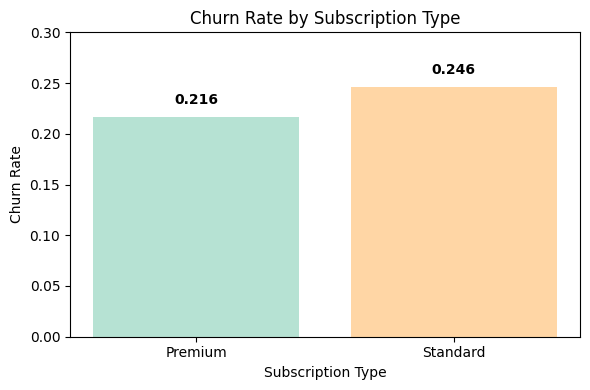

In [23]:
# Barplot:Churn Rate by Subscription Type (excluding 'Unknown')
subs_cols =['subscription_type_Premium','subscription_type_Standard']
subs_labels= ['Premium', 'Standard']
churn_rates=[df[df[col]==1]['is_churned'].mean() for col in subs_cols]

plt.figure(figsize=(6,4))
bars= plt.bar(subs_labels, churn_rates,color=['#B6E2D3', '#FFD6A5'])
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.ylim(0, 0.3)

# Add churn rate values above each bar
for bar in bars:
    yval =bar.get_height()
    plt.text(
        bar.get_x()+bar.get_width() / 2, 
        yval + 0.01, 
        f"{yval:.3f}", 
        ha='center',va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

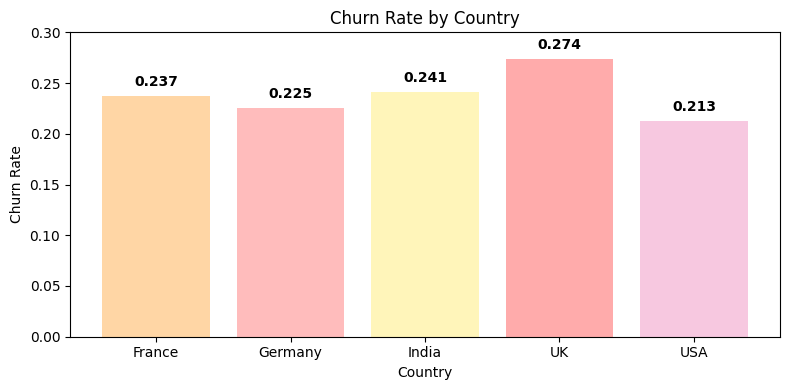

In [24]:
# Barplot: Churn Rate by Country (excluding 'Unknown')
country_cols = ['country_France', 'country_Germany', 'country_India', 'country_UK', 'country_USA']
country_labels = [col.replace('country_', '') for col in country_cols]
churn_rates = [df[df[col] == 1]['is_churned'].mean() for col in country_cols]

# Warm pastel colors for each country
warm_colors = ['#FFD6A5', '#FFBCBC', '#FFF5BA', '#FFABAB', '#F7C8E0']

plt.figure(figsize=(8, 4))
bars = plt.bar(country_labels, churn_rates, color=warm_colors)
plt.title('Churn Rate by Country')
plt.ylabel('Churn Rate')
plt.xlabel('Country')
plt.ylim(0, 0.3)

# Add values on top of each bar
for bar, rate in zip(bars, churn_rates):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{rate:.3f}",
        ha='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


## 4.  Predictive Modelling

### Logistic Regression Model: Feature Selection, Approach, and Results

We developed a logistic regression model to predict customer churn using the following features:

- **tenure_days:** Measures customer longevity; shorter tenure correlates with higher churn risk.
- **Country variables (France, Germany, India, UK, USA):** Captures regional patterns, as certain countries showed higher churn rates during exploratory analysis.

These features were chosen for their statistical association with churn and business relevance.

#### **Model Approach**
- Data was split into training and test sets.
- Features were scaled for better model stability.
- Logistic regression was selected for its interpretability and suitability for binary outcomes.
- Balanced class weights addressed the class imbalance.

#### **Model Results**
- **Accuracy:** The model achieved around 60% accuracy.
- **ROC AUC:** The AUC score was approximately 0.50, indicating the model's performance is similar to random guessing.
- **Precision & Recall:** Both metrics were relatively low, especially for identifying churned users.
- **Feature Importance:** The most influential features were **tenure_days** and country variables (especially India, France, and the UK). However, even these variables provided limited predictive power.

#### **Summary of Findings**
- The available features did not allow for strong churn prediction; the model could not reliably distinguish between churned and retained users.
- Despite limited predictive accuracy, the analysis highlighted that newer customers and users in certain countries are at a somewhat higher risk of churning.
- These findings suggest a need for richer customer data and more detailed behavioral features to improve churn prediction in future work.


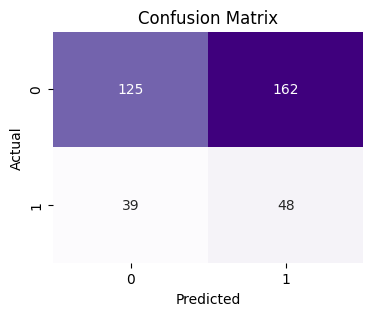

Classification Report (Precision, Recall, F1 Score only):

              precision  recall  f1-score
No Churn          0.762   0.436     0.554
Churn             0.229   0.552     0.323
macro avg         0.495   0.494     0.439
weighted avg      0.638   0.463     0.501


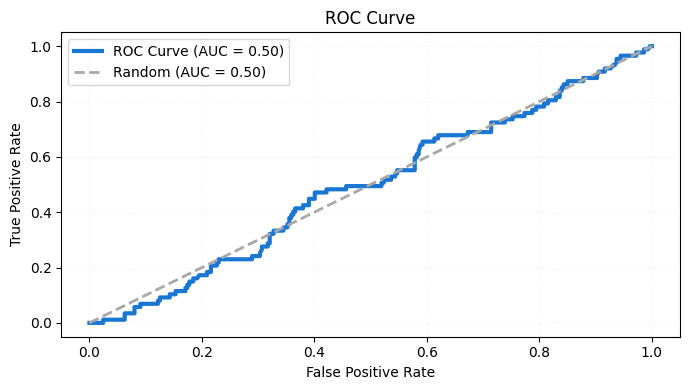

Most important predictors (by absolute coefficient value):

        Feature  Coefficient
  country_India     0.098854
 country_France     0.093699
     country_UK     0.079012
    country_USA     0.052351
country_Germany     0.045048
    tenure_days     0.040292


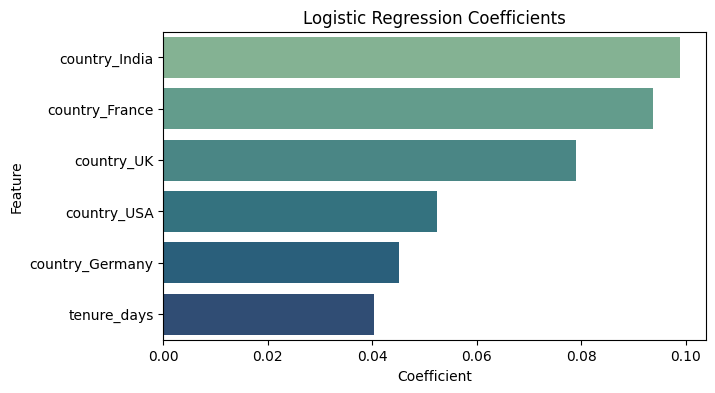

0.495874884857223


In [ ]:
#Select Features
features = [
    'tenure_days',
    'country_France',
    'country_Germany',
    'country_India',
    'country_UK',
    'country_USA'
]
X = df[features]
y = df['is_churned'].astype(int)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
#Feature Scaling
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

#Logistic Regression Model
logreg =LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

#Predictions
y_pred =logreg.predict(X_test_scaled)
y_prob= logreg.predict_proba(X_test_scaled)[:, 1]


# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report as dict
report_dict = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(3)
report_df = report_df[['precision', 'recall', 'f1-score']]
order = ['No Churn', 'Churn', 'macro avg', 'weighted avg']
report_df =report_df.loc[order]
print("Classification Report (Precision, Recall, F1 Score only):\n")
print(report_df)

#ROC AUC Score
fpr, tpr, _ =roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(7, 4))
plt.plot(
    fpr, tpr,
    label=f'ROC Curve (AUC = {auc:.2f})',
    color='#1976D2',
    linewidth=3,
    linestyle='-'
)
plt.plot([0, 1], [0, 1], linestyle='--', color='#A8A8A8', linewidth=2, label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.18)
plt.tight_layout()
plt.show()

#Feature Importance(Coefficients)
coef_df = pd.DataFrame({
    'Feature':features,
    'Coefficient':logreg.coef_[0]
})

# Sort byabsolute value of coefficients descending
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print("Most important predictors (by absolute coefficient value):\n")
print(coef_df.to_string(index=False))

# Plot Feature Importance
plt.figure(figsize=(7,4))
sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Feature',
    hue='Feature',    
    palette='crest',
    dodge=False,
    legend=False      
)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

## 5. Business Questions to Answer

### 5.2 Does watch time impact churn likelihood? 

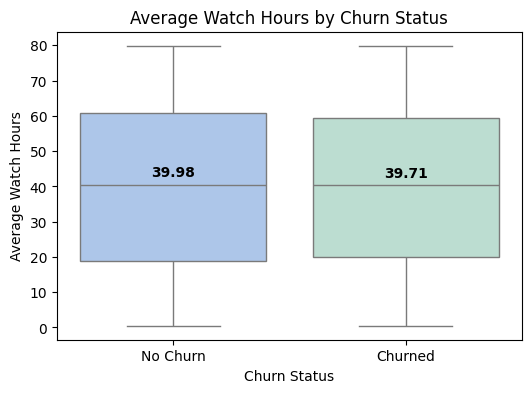

In [19]:
#Map churn labels for x-axis
df['churn_label'] =df['is_churned'].map({0: 'Churned', 1: 'No Churn'})

plt.figure(figsize=(6, 4))
ax = sns.boxplot(
    data=df,
    x='churn_label',
    y='average_watch_hours',
    hue='churn_label',     
    palette=['#A3C4F3', '#B6E2D3'],
    dodge=False
)

plt.title('Average Watch Hours by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Watch Hours')

# Calculate means fo annotation
means = df.groupby('churn_label')['average_watch_hours'].mean()
positions =[0,1]

# Annotate mean values on the plot
for pos, mean in zip(positions, means):
    ax.text(pos, mean+ mean*0.05, f'{mean:.2f}', 
            ha='center', va='bottom', fontweight='bold', color='black')

plt.show()

# Prepare and print summary table with labels
summary =pd.DataFrame({
    'Churn Status': ['Churned (0)','No Churn (1)'],
    'Mean Average Watch Hours': means.values,
    'Median Average Watch Hours': df.groupby('churn_label')['average_watch_hours'].median().values
})

### 5.3 Are mobile dominant users more likely to cancel?

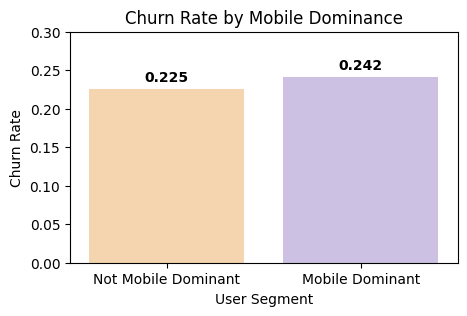

In [20]:
# Calculate median of mobile_app_usage_pct
median_mobile_usage =df['mobile_app_usage_pct'].median()

# Create groups based on median
df['mobile_dominant'] =(df['mobile_app_usage_pct'] > median_mobile_usage).astype(int)

#Calculate churn rate by mobile dominant status
churn_by_mobile =df.groupby('mobile_dominant')['is_churned'].mean()

# Plot barplot without cutoff value in title
plt.figure(figsize=(5,3))
ax = sns.barplot(
    x=['Not Mobile Dominant', 'Mobile Dominant'],
    y=churn_by_mobile.values,
    hue=['Not Mobile Dominant', 'Mobile Dominant'],
    palette=['#FFD6A5', '#CABBE9'],
    legend=False
)
plt.title('Churn Rate by Mobile Dominance')
plt.ylabel('Churn Rate')
plt.xlabel('User Segment')
plt.ylim(0, 0.3)

#Add valuesabove bars
for i, v in enumerate(churn_by_mobile.values):
    ax.text(i, v +0.01,f"{v:.3f}", ha='center', fontweight='bold')

plt.show()



### 5.4 What are the top 3 features influencing churn based on your model?

,Feature,Coefficient
3,country_India,0.098854
1,country_France,0.093699
4,country_UK,0.079012


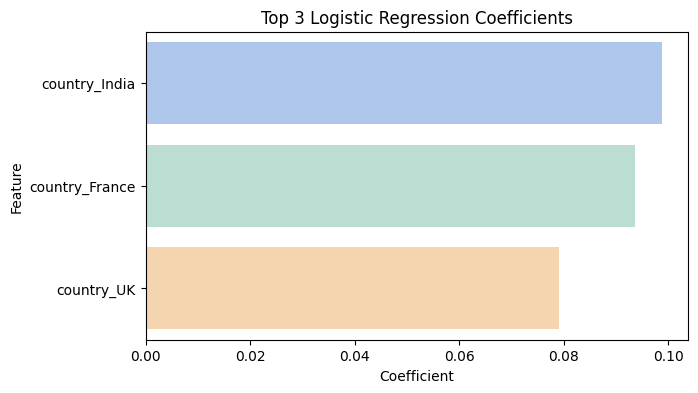

In [21]:
# Feature Importance(Coefficients)
coef_df =pd.DataFrame({
    'Feature': features,
    'Coefficient':logreg.coef_[0]
}).sort_values(by='Coefficient',key=abs, ascending=False)
display(coef_df.head(3))

# Define pastel colors (uno por cada barra)
pastel_colors= ['#A3C4F3','#B6E2D3', '#FFD6A5']

plt.figure(figsize=(7, 4))
sns.barplot(
    data=coef_df.head(3),
    x='Coefficient',
    y='Feature',
    hue='Feature',      
    palette=pastel_colors,
    dodge=False,
    legend=False         
)
plt.title('Top 3 Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
